#### Large RAM is required to load the larger models. Running on GPU can optimize inference speed.

In [1]:
# !pip install salesforce-lavis

In [30]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess
import numpy as np
from tqdm import tqdm

In [4]:
# setup device to use
device = torch.device("cuda:6") if torch.cuda.is_available() else "cpu"
device

device(type='cuda')

In [5]:
# we associate a model with its preprocessors to make it easier for inference.
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
# )

# Other available models:
#
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
)
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

vis_processors.keys()

dict_keys(['train', 'eval'])

In [8]:
# images = np.load('cache/processed_data/BIGMEG1/test_images1b_sub-BIGMEG1.npy', mmap_mode='r')
# images.shape

(2400, 425, 425, 3)

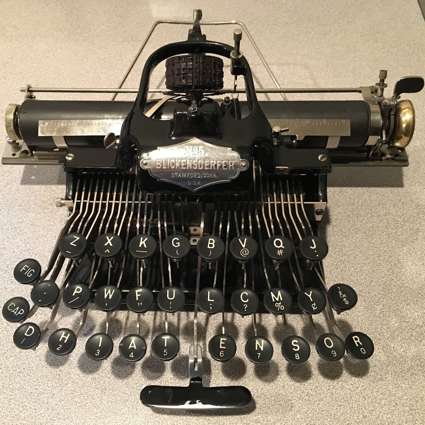

In [26]:
# image_pil = Image.fromarray(images[6].astype(np.uint8))
# display(image_pil)

In [27]:
# image = vis_processors["eval"](image_pil).unsqueeze(0).to(device)

In [28]:
# model.generate({"image": image})

['an old fashioned typewriter with many keys on it']

## train set

In [ ]:
images = np.load('cache/processed_data/BIGMEG1/test_images1b_sub-BIGMEG1.npy', mmap_mode='r')
captions = []
for i in tqdm(range(len(images)), total=len(images), desc="test captions"):
    image_pil = Image.fromarray(images[i].astype(np.uint8))
    image = vis_processors["eval"](image_pil).unsqueeze(0).to(device)
    captions.append(model.generate({"image": image})[0])
np.save('cache/processed_data/BIGMEG1/test_captions1b_sub-BIGMEG1.npy', captions)

## test set

In [31]:
images = np.load('cache/processed_data/BIGMEG1/train_images1b_sub-BIGMEG1.npy', mmap_mode='r')
captions = []
for i in tqdm(range(len(images)), total=len(images), desc="train captions"):
    image_pil = Image.fromarray(images[i].astype(np.uint8))
    image = vis_processors["eval"](image_pil).unsqueeze(0).to(device)
    captions.append(model.generate({"image": image})[0])
np.save('cache/processed_data/BIGMEG1/train_captions1b_sub-BIGMEG1.npy', captions)

  0%|          | 20/22248 [00:30<9:16:00,  1.50s/it] 


KeyboardInterrupt: 

In [32]:
# captions

['a close up of a man wearing a vest and a pink tie',
 'barbed wire on a fence in front of a field',
 'chocolate fondue with strawberries and marshmallows',
 'a camel is walking across a field with mountains in the background',
 'two stingrays swimming in shallow water on a sandy beach',
 'an antique china dinner set on top of a table',
 'a young boy sitting at a desk with a computer in front of him',
 'a golden tuba sitting next to a black bag',
 'four small plastic bottles with yellow tops on them',
 'a green shield with a celtic cross on it',
 'three credit cards stacked on top of each other',
 'a brown leather sheath for a knife on a white surface',
 'a close up view of a granite surface',
 'a washer and dryer sitting next to each other',
 'a glass of milk being poured into a glass',
 'three small gift boxes with ribbons tied around them',
 'spoonful of honey mustard sauce in a bowl',
 'a small white router sitting on top of a table',
 'a shirtless man sitting on a chair eating a s

#### Load an example image

In [19]:
# img_url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png'
# raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
# display(raw_image.resize((596, 437)))

#### Load pretrained/finetuned BLIP2 captioning model

#### prepare the image as model input using the associated processors

In [6]:
# image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [7]:
# model.generate({"image": image})

['the merlion fountain in singapore']

In [9]:
images[0].shape

(425, 425, 3)

#### generate multiple captions using nucleus sampling

In [8]:
# # due to the non-determinstic nature of necleus sampling, you may get different captions.
# model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['singapore the merlion, marina bay sands and skyline',
 'singapore merlion at sunset',
 'singapore by the riverside at dusk']

#### instructed zero-shot vision-to-language generation

In [ ]:
# model.generate({"image": image, "prompt": "Question: which city is this? Answer:"})

In [ ]:
# model.generate({
#     "image": image,
#     "prompt": "Question: which city is this? Answer: singapore. Question: why?"})

In [ ]:
# context = [
#     ("which city is this?", "singapore"),
#     ("why?", "it has a statue of a merlion"),
# ]
# question = "where is the name merlion coming from?"
# template = "Question: {} Answer: {}."

# prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

# print(prompt)

In [ ]:
# model.generate(
#     {
#     "image": image,
#     "prompt": prompt
#     },
#     use_nucleus_sampling=False,
# )